# **Advanced AI Coursework**
*B716460*

Aims for this report:
* Implementation of a Convolutional Neural Network.
* Implementation of a Recurrent Neural Network.
* Results from a range of different parameters.
* Produce varying comparisons of the two architectures and how they differ.

## **Dataset Generation**

Get the CIFAR-10 dataset from the Keras API, and convert the downloaded dataset labels to a binary class matrix for faster processing.

Where it states; 

`(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()`

All necessary testing and training images, along with their associated labels to represent its particular class. In this case there are 10 classes used for image classification.

Once the builtin MNIST dataloader has been executed, then the associated labels from both the training and testing sets are converted to binary matrices

The MNIST dataset comes pre-normalised, so normalisation on the given set is not required.

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
# Using the builtin DataLoader from Tensorflow framework.

training_images = training_images.reshape(list(training_images.shape) + [1])
testing_images = testing_images.reshape(list(testing_images.shape) + [1])
# Reshape the data to have a single dimension for individual images to have compatibility with Alexnet CNN.
# Reshaped to ((number of images)*28x28*1).

training_labels = tf.keras.utils.to_categorical(training_labels)
testing_labels = tf.keras.utils.to_categorical(testing_labels)

## **Validation Set Generation**

Split the training dataset into a smaller training dataset so we can extract a validation dataset for training future neural networks.

More specifically, the training dataset will be sliced to create a validation data set.

Overall, the MNIST dataset will consist of a training set, a validation set and a testing set. This will provide a non-bias means of validating the accuracy and loss values from our model.

In [32]:
# Generate the validation set from the training set via appending a subset of training data to the validation set.
validation_images = training_images[-10000:]
validation_labels = training_labels[-10000:]



# Finally, removing said data from the training set.
training_images = training_images[:-10000]
training_labels = training_labels[:-10000]

## **AlexNet Model**

Source code below is an implementation of a Convolutional Neural Network model, more specifically the well known AlexNet model.

Keras API sequential neural network model. This sequential model follows the AlexNet structure but has
been tweaked to conform with the MNIST's dataset image shape.

[AlexNet Source Code](https://medium.com/analytics-vidhya/alexnet-tensorflow-2-1-0-d398b7c76cf)

Original model was taken from this article and modified to adjust to the shape of the MNIST dataset (28x28x1 to account for grayscale).

In [33]:
def generate_alexnet_model():
    return tf.keras.models.Sequential(
      [
        # 1st layer
        tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
        # 2nd layer
        tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        # 3rd layer
        tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        # 4th layer
        tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        # 5th layer
        tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
        # To Flatten layer
        tf.keras.layers.Flatten(),
        # To FC layer 1
        tf.keras.layers.Dense(4096, activation='relu'),
        #To FC layer 2
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(testing_labels.shape[1], activation='softmax')
      ]
    )

alexnet_model = generate_alexnet_model()

## **AlexNet Model Compilation and Summary**

Compile the model and print a summary results list of the given model.

In [34]:
alexnet_model.compile(optimizer='Adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

alexnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 5, 5, 96)          11712     
_________________________________________________________________
batch_normalization_27 (Batc (None, 5, 5, 96)          384       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 2, 2, 256)         2973952   
_________________________________________________________________
batch_normalization_28 (Batc (None, 2, 2, 256)         1024      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 384)         885120    
_________________________________________________________________
batch_normalization_29 (Batc (None, 2, 2, 384)        

## **AlexNet Model Fitting**

Along with the maximum number of epochs defined for both future model training, the model fitting stage is shown below, along with the given loss functions and accuracies against the training set and validation set.

In [35]:
max_epochs = 10

alexnet_history = alexnet_model.fit(
    training_images, 
    training_labels, 
    epochs=max_epochs, 
    validation_data=(validation_images, validation_labels),
    batch_size=128
    )


Epoch 1/10
391/391 [==============================] - 24s 60ms/step - loss: 0.6712 - accuracy: 0.8446 - val_loss: 0.1851 - val_accuracy: 0.9491

## **AlexNet CNN Model Evaluation and Results**

Plotting the models data to represent the loss value against its training data and the validation data. Using the testing set which comprises of the image dataset and its associated labels, running the 'model.evaluate' function will produces accurate results as to how the model performs in image classification on an unknown dataset.

Method returns a list object, where it can be stored and compared against future model evaluations.

In [36]:
alexnet_results = alexnet_model.evaluate(testing_images, testing_labels)

print('AlexNet Model loss: %s \nAlexNet Model Accuracy: %s' % (alexnet_results[0], alexnet_results[1]))

313/313 [==============================] - 4s 12ms/step - loss: 0.0888 - accuracy: 0.9772

## **AlexNet Loss Graph Analysis**

The first graph to show after `model.fit()` has been executed is shown below. 

The graphs below show the history of the training and validation phase in relation to its loss function values and accuracy values per epoch.

Overall analysis of the results shown from this graph details that the loss value sharply decreases along with the first `3-4 epochs` of the cycle, but offer harsh diminishing returns as the future epochs do not offer much of an improvement in terms of the training loss value. 

The validation loss value also shows some improvement over the first few epochs of fitting from the model, following the same pattern as the training loss values. This model offers diminishing returns to go over 4 epochs, where in this particular case it even increased in loss value. This shows a possibility of the model knowing its training set too well, causing possible overfitting. 

To further support this, the training loss value kept decreasing despite its corresponding validation loss value being stagnant or even increasing, showing a pattern of opposing behaviour in relation to the cycle of loss values and their given sets.

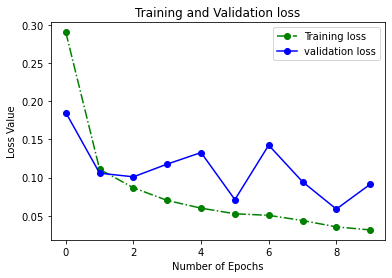

In [37]:
epochs = range(0, max_epochs)
# Using the max_epochs constant to create an iterable object of the range of epochs to generate valid X axes.

plt.plot(epochs, alexnet_history.history['loss'], 'go-.', label='Training loss')
plt.plot(epochs, alexnet_history.history['val_loss'], 'bo-', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## **AlexNet Accuracy Graph Analysis**

This graph, where accuracy values are plotted in relation to its given epoch.

The values show a sharp increase in accuracy during the first `4 epochs` towards its training accuracy, however for the validation accuracies there was less of a sharp increase, and more of a consistent, steady increase for the first 4 epochs that decayed in its increase in value over the rest of the given epochs.

This graph shows a correlation with its related loss function graph, where the first few epochs show a significant growth in terms of a decrease in loss value, and an increase in accuracy.

This further supports that, if the number of epochs is a concern along with overfitting, then reducing the number of epochs is a possible option which will keep a near to same level of performance.

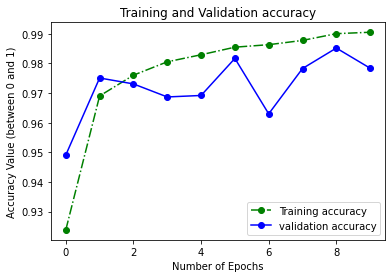

In [38]:
plt.plot(epochs, alexnet_history.history['accuracy'], 'go-.', label='Training accuracy')
plt.plot(epochs, alexnet_history.history['val_accuracy'], 'bo-', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value (between 0 and 1)')
plt.legend()

plt.show()

*Alexnet implementation complete and results shown.*

# **Recurrent Neural Network**


## **Dataset Preprocessing**

Recurrent Neural Network expects a sequence of 28x28 images in that case, and current the sets are of a shape ((number of images) x 28 x 28 x 1) so trimming the 4th dimension is necessary for compatibility.

Since the same loss function (Categorical Crossentropy) is being used to compile this model, then the labels in the binary matrix format are still suitable and do not need modification.

In [39]:
testing_images = testing_images[:, :, :, 0]
training_images = training_images[:, :, :, 0]
validation_images = validation_images[:, :, :, 0]

## **RNN Neural Network Model**

Source code below is an implementation of a given Recurrent Neural Network Model. 

In [40]:
def generate_rnn_model():
    return tf.keras.Sequential(
        [
            # 1st layer
            tf.keras.layers.SimpleRNN(128, input_shape=(None, 28), dropout=0.2, return_sequences=True),
            tf.keras.layers.BatchNormalization(),

            # 2nd layer
            tf.keras.layers.SimpleRNN(128, dropout=0.2),
            tf.keras.layers.BatchNormalization(),

            # Fully Connected Layer
            tf.keras.layers.Dense(10), # 0 to 9 Labels.
            tf.keras.layers.Activation('softmax')
        ]
    )

rnn_model = generate_rnn_model()

## **RNN Model Compilation**

Compiling the model using the same loss function and optimizer as the AlexNet CNN to provide accurate comparisons between the two architectures.

In [41]:
rnn_model.compile(optimizer='Adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 128)         20096     
_________________________________________________________________
batch_normalization_32 (Batc (None, None, 128)         512       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
batch_normalization_33 (Batc (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 55,306
Trainable params: 54,794
Non-trainable params: 512
________________________________________________

## **RNN Model Fitting**

The model fitting stage is shown below, along with the given loss functions and accuracies against the training set and validation set.

In [42]:
rnn_history = rnn_model.fit(
    training_images, 
    training_labels, 
    epochs=max_epochs, 
    validation_data=(validation_images, validation_labels),
    batch_size=128
    )

Epoch 1/10
391/391 [==============================] - 11s 25ms/step - loss: 1.6272 - accuracy: 0.4379 - val_loss: 0.6066 - val_accuracy: 0.7918

## **RNN Model Evaluation**

Plotting the model's data to represent the loss value against its training data and the validation data. Using the testing set which consists of the image dataset and its associated labels, running the 'model.evaluate' function will produces accurate results as to how the model performs in image classification on an unknown dataset.

Method returns a list object, where it can be stored and compared against future model evaluations.

In [43]:
rnn_results = rnn_model.evaluate(testing_images, testing_labels)

print('\nAlexNet Model loss: %s \n\nAlexNet Model Accuracy: %s' % (rnn_results[0], rnn_results[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.1648 - accuracy: 0.9540

## **RNN Loss Graph Analysis**

An overall analysis shares many similar patterns to the AlexNet loss graph, where there is a sharp decrease in loss function value in both the training loss and validation loss. However, it also shares the quality that, the validation loss tapers off in terms of its decrease in value per epoch past `3-4 epochs`.

Also, worth noting that, the validation loss didn't necessarily make any significant improvements beyond 4 epochs.

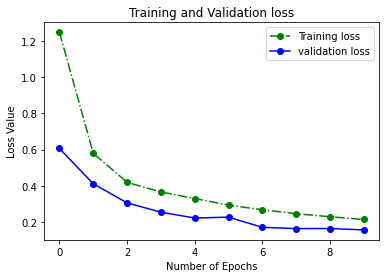

In [44]:
epochs = range(0, max_epochs)
# Using the max_epochs constant to create an iterable object of the range of epochs to generate valid X axes.

plt.plot(epochs, rnn_history.history['loss'], 'go-.', label='Training loss')
plt.plot(epochs, rnn_history.history['val_loss'], 'bo-', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## **RNN Accuracy Graph Analysis**

Lastly, the graph shown below displays the accuracy values per epoch given from the Training dataset and validation dataset.

This graph, again, displays similar traits to the equivalent AlexNet accuracy graph where it displays a sharp increase in accracy for the first `3-4 epochs`, then stagnates in terms of an increase in accuracy, in terms of differences between each epoch.

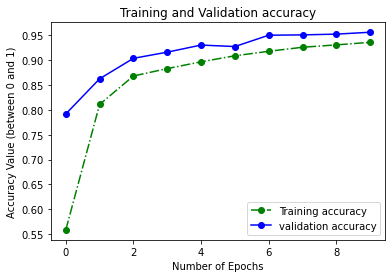

In [45]:
plt.plot(epochs, rnn_history.history['accuracy'], 'go-.', label='Training accuracy')
plt.plot(epochs, rnn_history.history['val_accuracy'], 'bo-', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value (between 0 and 1)')
plt.legend()

plt.show()

# **Neural Network Parameter Adjustments**

The graphs shown below are cases of RNN models and CNN Models, where the learning rate, and the choice of optimisers are adjusted at various intervals to find the best performing combinations.

In this case, they will be fitted on 4 epoch cycles, as through previous tests it has shown that negligible increases in performance, if any, are given from increasing this value.

In [46]:
max_epochs = 4

class NNModelParameters:

    def __init__(self):

        self.optimizer_values = {}
        self.histories = []
        self.evaluations = []
        self.max_epochs = 4

        self.learning_rates = [
            0.01,
            0.001,
            0.0001]

        self.optimizers = {
            'Adam': tf.keras.optimizers.Adam,
            'SGD': tf.keras.optimizers.SGD,
            'RMSprop': tf.keras.optimizers.RMSprop}

    def generate_optimizer_values(self):
        for optimizer_key, optimizer_value in self.optimizers.items():
            for i, rate in enumerate(self.learning_rates):
                optimizer_name = f'{optimizer_key}_rate-{i}'
                self.optimizer_values[
                    optimizer_name] = optimizer_value(learning_rate=rate)
                print('Generated Optimizer: %s' % optimizer_name)

    def generate_histories(self, model_type):
        # Requires `generate_optimizer_values` to have been executed.
        for optimizer_value in self.optimizer_values:

            model = eval('generate_' + model_type + '_model()')
            generate_alexnet_model()

            model.compile(
                optimizer=self.optimizer_values[optimizer_value],
                loss='CategoricalCrossentropy',
                metrics=['accuracy'])
            print('Finished compiling model with optimizer %s, moving on to fitting...' % optimizer_value)

            self.histories.append(model.fit(training_images,
                training_labels,
                epochs=max_epochs,
                validation_data=(validation_images, validation_labels),
                batch_size=128,
                verbose=0))

            print('Fitting Done. Evaluating %s' % optimizer_value)
            self.evaluations.append(
                model.evaluate(testing_images, testing_labels))

    def get_histories(self):
        return self.histories

    def get_evaluations(self):
        return self.evaluations

### Graph Plotting Function

In [64]:
epochs = range(0,4)

def plot_graph(title, histories, graph_type, labels):

    colours = ['r', 'g', 'b']

    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['val_' + graph_type], colours[i] + 'o-.',
                 label='Testing ' + labels[i] + ' ' + graph_type)
        plt.plot(epochs, history.history[graph_type], colours[i] + 'o-',
                 label='Validation ' + labels[i] + ' ' + graph_type)

    plt.title(title)

    plt.xlabel('Number of Epochs')
    plt.ylabel(graph_type + ' Value')
    plt.legend()

    plt.show()

## **Alexnet CCN Dataset Conversion**

In [ ]:
training_images = training_images.reshape(list(training_images.shape) + [1])
testing_images = testing_images.reshape(list(testing_images.shape) + [1])
validation_images = validation_images.reshape(list(validation_images.shape) + [1])
# Reshape the data to have a single dimension for individual images to have compatibility with AlexNet CNN.
# Reshaped to ((number of images)*28x28*1).


## **Alexnet Parameter Tuning**

In [ ]:
alexnet_mp = NNModelParameters()
alexnet_mp.generate_optimizer_values()
alexnet_mp.generate_histories('alexnet')

## **AlexNet History and Label Graph Preprocessing**

In [67]:
alexnet_histories = alexnet_mp.get_histories()

alexnet_adam_labels = ['Adam 0.01', 'Adam 0.001', 'Adam 0.0001']

alexnet_sgd_labels = ['SGD 0.01', 'SGD 0.001', 'SGD 0.0001']

alexnet_rmsprop_labels = ['RMSprop 0.01', 'RMSprop 0.001', 'RMSprop 0.0001']

## **Alexnet Parameters Loss Graph Analysis**

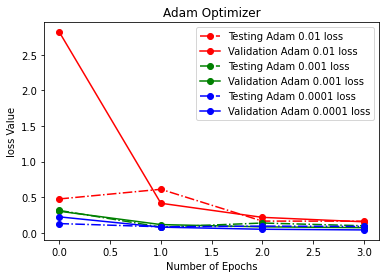

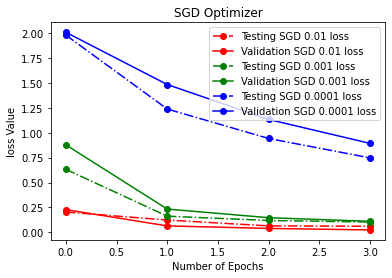

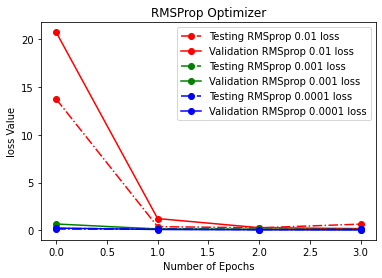

In [68]:
plot_graph('Adam Optimizer', alexnet_histories[0:3], 'loss', alexnet_adam_labels)
plot_graph('SGD Optimizer', alexnet_histories[3:6], 'loss', alexnet_sgd_labels)
plot_graph('RMSProp Optimizer', alexnet_histories[6:9], 'loss', alexnet_rmsprop_labels)

## **Alexnet Parameters Accuracy Graph Analysis** 

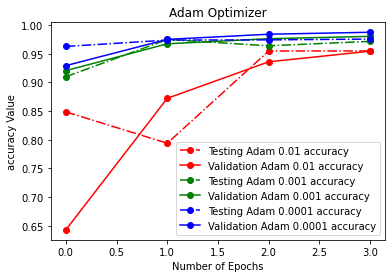

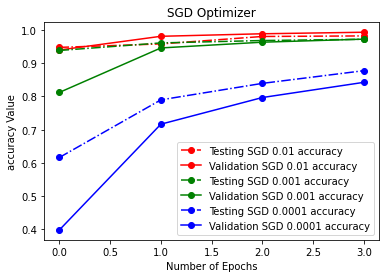

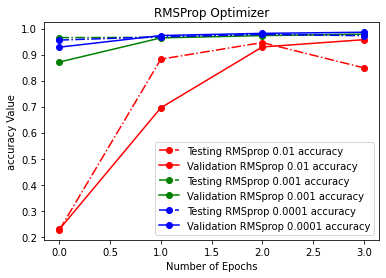

In [69]:
plot_graph('Adam Optimizer', alexnet_histories[0:3], 'accuracy', alexnet_adam_labels)
plot_graph('SGD Optimizer', alexnet_histories[3:6], 'accuracy', alexnet_sgd_labels)
plot_graph('RMSProp Optimizer', alexnet_histories[6:9], 'accuracy', alexnet_rmsprop_labels)

## **RNN Dataset Conversion**

In [70]:
training_images = training_images[:, :, :, 0]
testing_images = testing_images[:, :, :, 0]
validation_images = validation_images[:, :, :, 0]

## **RNN Parameter Tuning**

In [ ]:
rnn_mp = NNModelParameters()
rnn_mp.generate_optimizer_values()
rnn_mp.generate_histories('rnn')

## **RNN History and Label Graph Preprocessing**

In [ ]:
rnn_histories = rnn_mp.get_histories()

rnn_adam_labels = ['Adam 0.01', 'Adam 0.001', 'Adam 0.0001']

rnn_sgd_labels = ['SGD 0.01', 'SGD 0.001', 'SGD 0.0001']

rnn_rmsprop_labels = ['RMSprop 0.01', 'RMSprop 0.001', 'RMSprop 0.0001']

## **RNN Parameters Loss Graph Analysis**

In [ ]:
plot_graph('Adam Optimizer', alexnet_histories[0:3], 'loss', rnn_adam_labels)
plot_graph('SGD Optimizer', alexnet_histories[3:6], 'loss', rnn_sgd_labels)
plot_graph('RMSProp Optimizer', alexnet_histories[6:9], 'loss', rnn_rmsprop_labels)

## **RNN Parameters Accuracy Graph Analysis**

In [ ]:
plot_graph('Adam Optimizer', alexnet_histories[0:3], 'accuracy', rnn_adam_labels)
plot_graph('SGD Optimizer', alexnet_histories[3:6], 'accuracy', rnn_sgd_labels)
plot_graph('RMSProp Optimizer', alexnet_histories[6:9], 'accuracy', rnn_rmsprop_labels)